In [10]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Define symbols and function
x, y = sp.symbols('x y')
f =  x**2 + y**2
print("f(x,y) =", f)


f(x,y) = x**2 + y**2


In [12]:
# Compute the gradient (partial derivatives)
gradient = [sp.diff(f, x), sp.diff(f, y)]
print("Gradient:", gradient)

Gradient: [2*x, 2*y]


In [13]:
# Solve for stationary points (where the gradient equals zero)
stationary_points = sp.solve(gradient, (x, y), dict=True)  # using dict=True to get dictionaries
print("Stationary Points:", stationary_points)

Stationary Points: [{x: 0, y: 0}]


In [14]:
# Filter only real stationary points
points = [pt for pt in stationary_points if all(val.is_real for val in pt.values())]

# Compute the Hessian matrix (second partial derivatives)
Hessian = [[sp.diff(f, x, x), sp.diff(f, x, y)],
           [sp.diff(f, y, x), sp.diff(f, y, y)]]
print("Hessian Matrix:", Hessian)

Hessian Matrix: [[2, 0], [0, 2]]


In [15]:

def classify_stationary_point(Hessian, point):
    # Check that 'point' is a dictionary and extract x and y values
    if not isinstance(point, dict):
        point = dict(zip([x, y], point))
    
    # Evaluate the Hessian matrix at the given point 
    H_eval_list = [[expr.subs(point) for expr in row] for row in Hessian]
    
    # Local classification based on the determinant and trace of the Hessian matrix
    D = H_eval_list[0][0] * H_eval_list[1][1] - H_eval_list[0][1] * H_eval_list[1][0]
    f_xx = H_eval_list[0][0]
    D_val = float(sp.N(D, chop=True))
    f_xx_val = float(sp.N(f_xx, chop=True))
    
    if D_val > 0:
        if f_xx_val > 0:
            local_ext = "Minimum"
            local_convexity = "konvex"
        elif f_xx_val < 0:
            local_ext = "Maximum"
            local_convexity = "konkav"
        else:
            local_ext = "nicht eindeutig (f_xx = 0)"
            local_convexity = "Indeterminiert"
    elif D_val < 0:
        local_ext = "Sattelpunkt"
        local_convexity = "Indefinit"
    else:
        local_ext = "nicht eindeutig (D = 0)"
        local_convexity = "Indeterminiert"
    
    # Für globale Klassifikation: 
    # Bei quadratischen Funktionen (konstante Hesse-Matrix) reicht die Eigenwertanalyse aus.
    H_eval = sp.Matrix(H_eval_list)
    eigenvalues = [float(sp.N(ev, chop=True)) for ev in H_eval.eigenvals().keys()]
    
    if local_ext == "Minimum" and all(ev > 0 for ev in eigenvalues):
        global_ext = "Global minimum (global konvex)"
    elif local_ext == "Maximum" and all(ev < 0 for ev in eigenvalues):
        global_ext = "Global maximum (global konkave)"
    else:
        # Bei Sattelpunkt oder unklaren Fällen wird nur die lokale Klassifikation zurückgegeben
        global_ext = local_ext
    
    return global_ext, local_convexity


In [16]:
# Classify all stationary points and print results
for point in points:
    classification = classify_stationary_point(Hessian, point)
    print(f"\nStationary point {point}:")
    print("Classification:", classification[0])
    print("Convexity/Concavity:", classification[1])


Stationary point {x: 0, y: 0}:
Classification: Global minimum (global konvex)
Convexity/Concavity: konvex


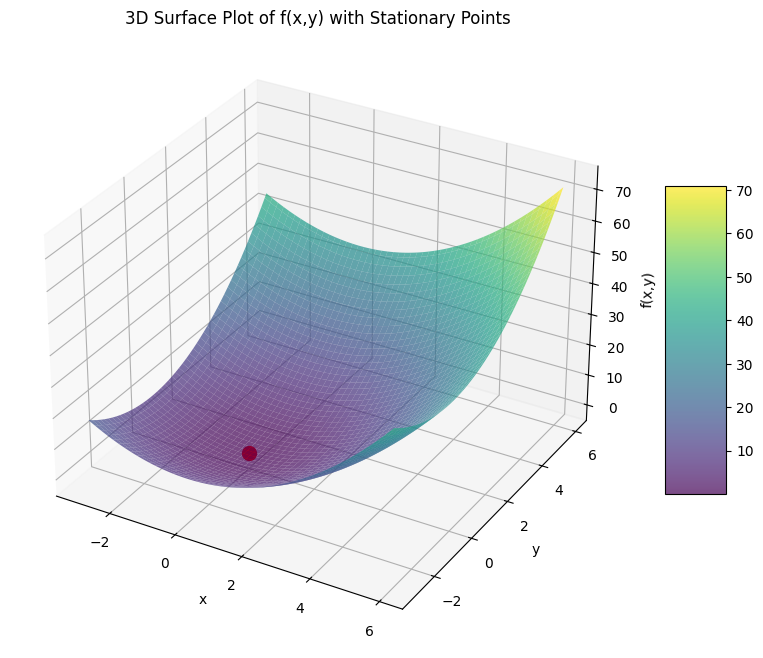

In [17]:
# Create a meshgrid for x and y values
x_vals = np.linspace(-3, 6, 100)
y_vals = np.linspace(-3, 6, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Convert the sympy function f into a numpy-compatible function using lambdify
f_lambdified = sp.lambdify((x, y), f, 'numpy')
Z = f_lambdified(X, Y)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface of the function
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=5)

# Mark the stationary points on the surface
for point in points:
    # Ensure the point is a dictionary and extract its x and y values
    if not isinstance(point, dict):
        point = dict(zip([x, y], point))
    x_val = float(point[x])
    y_val = float(point[y])
    z_val = f_lambdified(x_val, y_val)
    ax.scatter(x_val, y_val, z_val, color='red', s=100, marker='o')

# Set plot labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('3D Surface Plot of f(x,y) with Stationary Points')

plt.show()

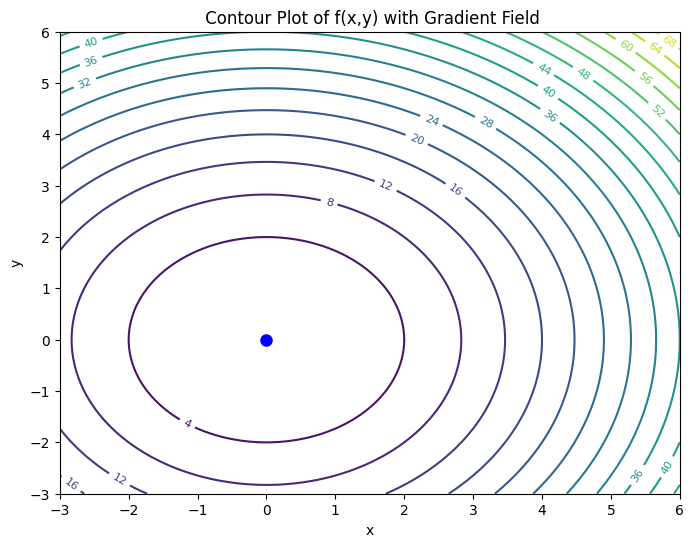

In [18]:
# Create a new figure for the 2D plot
plt.figure(figsize=(8, 6))

# Create a contour plot of the function
contours = plt.contour(X, Y, Z, levels=20,cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.title(' Contour Plot of f(x,y) with Gradient Field')
plt.xlabel('x')
plt.ylabel('y')

# Convert the gradient components to numpy functions
grad_x = sp.lambdify((x, y), gradient[0], 'numpy')
grad_y = sp.lambdify((x, y), gradient[1], 'numpy')
U = grad_x(X, Y)
V = grad_y(X, Y)



# Mark the stationary points on the 2D plot
for point in points:
    if not isinstance(point, dict):
        point = dict(zip([x, y], point))
    x_val = float(point[x])
    y_val = float(point[y])
    plt.plot(x_val, y_val, 'bo', markersize=8)

plt.show()